# Assignment 1: Principal Component Analysis
Karla Aniela Cepeda Zapata<br/>
Time Series Analysis<br/>
D00242569

## Q5
Download the breast_cancer.csv file from Moodle and read it into Python. In the diagnosis column, it contains details on whether a tumour is malignant (cancerous) or benign (non-cancerous). There is an id column for each patient. The other variables in the dataset are obtained from several cell images. Variables are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. Ten real-valued features are computed for each cell nucleus, and their mean, standard error and worst (highest) value are recorded:
* Radius (mean of distances from center to points on the perimeter)
* Texture (standard deviation of gray-scale values)
* Perimeter
* Area
* Smoothness (local variation in radius lengths)
* Compactness (perimeter² / area — 1.0)
* Concavity (severity of concave portions of the contour)
* Concave points (number of concave portions of the contour)
* Symmetry
* Fractal dimension (“coastline approximation” — 1)

##### Before starting....

In [1]:
# SETUP ENVIRONMENT
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats 
import math
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from sklearn.cluster import KMeans

os.chdir(r'E:\Karla\IRELAND v2\DKIT\2nd Semester\Time Series Analysis\CA\CA1')

pd.set_option('display.max_columns', None)

In [2]:
# Title for graphs
data_title = "Breast Cancer"

In [3]:
data = pd.read_csv('datasets/breast_cancer.csv')

In [4]:
# Change name of columns
data.columns = list(map(lambda s: s.lower().strip(), data.columns))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are no misssing values. Let's explore the data.

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Not useful, drop it
data.drop(columns="id", inplace=True)

For me this looks better.

##### Methods

In [8]:
def scale_data(df, graph=False):
    
    """
        Scale data
    
    """
    # Now, I am going to scale the values. 
    scaler = StandardScaler()
    std_df = scaler.fit_transform(df)
    
    if graph:    
        # The box plot shows how the scaled data is located.
        sns.boxplot(data=pd.DataFrame(std_df, columns=df.columns, index=df.index))
        plt.title(data_title + " - Centered and scaled to unit variance")
        plt.xticks(rotation=90)
        plt.show()
    
    return std_df
    

In [9]:
def compute_pca(df, std_df, num_comp=None):
    
    """
    
    """
    
    # Since the question is just asking for the first two principal components, I am going to create this two.
    if num_comp==None:
        num_comp = std_df.shape[1]
    
    pca = PCA(n_components=num_comp)
    pca.fit(std_df)

    # I am going to create a DataFrame to improve visualization of the PC1 and PC2
    col_PCs = ['PC' + str(x) for x in range(1, pca.n_components_+1)]
    PCs = pd.DataFrame(pca.components_.T, columns=col_PCs, index=df.columns)
    
    return (pca, PCs, col_PCs)

In [10]:
def plot_barGraphPC(df, namePC='PC1', draw_average=False):
    """
        Graph barplot
        
        Arguments:
         df = DataFrame which contains Princpal Components
         namePC = Name of PC which is going to be plotted. By default plots PC1.
        
    """
    
    ylim = 0
    addedlim = 0.25
    
    av_weight = math.sqrt(1/df.shape[1])
    
    negative_data = df.copy()
    positive_data = df.copy()

    negative_data.loc[negative_data[namePC]>0, namePC]=0
    positive_data.loc[positive_data[namePC]<0, namePC]=0
        
    if positive_data[namePC].max() > abs(negative_data[namePC].min()):
        ylim = positive_data[namePC].max()+addedlim        
    else:
        ylim = abs(negative_data[namePC].min())+addedlim
        
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.bar(negative_data.index,negative_data[namePC], width=1, edgecolor='k', color='None')
    ax.bar(negative_data.index,positive_data[namePC], width=1, edgecolor='k', color='None')
    plt.axhline(0, color='k', linewidth=0.5)
    plt.ylabel(namePC + " component loadings")
    plt.ylim(-ylim, ylim)
    
    if draw_average:
        plt.axhline(y=av_weight, linewidth=0.5, color='r')
        plt.axhline(y=(-av_weight), linewidth=0.5, color='r')
    
    plt.xticks(rotation=90)
    plt.title(data_title + " - " + namePC + " loadings")
    plt.show()
    
    print("Average loading contribution:", round(av_weight,2))
    
    df_avw = df[[namePC]].copy()
    df_avw['above_average'] = np.where(abs(df_avw[namePC]) > av_weight,'x','')
    return df_avw.sort_values(by=['above_average', namePC], ascending=False)

In [11]:
def plot_screeGraph(pca, cumulative=False):
    """
        Scree Plot
        
        Arguments:
            PC = pca object.
            cumulative = if % shown as cumulative or not.
        
    """
    
    PCs_exp = None
    col_PCs = ['PC' + str(x) for x in range(1, pca.n_components_+1)]
        
    if cumulative:
        PCs_exp = pd.Series(pca.explained_variance_ratio_.cumsum(), index=col_PCs)
    else:
        PCs_exp = pd.Series(pca.explained_variance_ratio_, index=col_PCs)
    
    fig, ax = plt.subplots()
    plt.bar(PCs_exp.index, height=PCs_exp)
    plt.title(data_title + " - Principal Components")
    plt.ylabel("Cumulative Explained Variance %" if cumulative else "Explained Variance %")
    plt.xticks(rotation=90)
        
    fig, ax = plt.subplots()
    plt.plot(PCs_exp)
    plt.title(data_title + " - Scree Plot")
    plt.ylabel("Cumulative Explained Variance %" if cumulative else "Explained Variance %")
    plt.xticks(rotation=90)
    
    plt.show()
        
    return pd.DataFrame(PCs_exp, columns=["cum_explained_variance" if cumulative else "explained_variance"])
    

Carry out a principal component analysis of the variables neck, abdomen, knee and ankle.

##### Selecting features

In [12]:
# Select columns that I am interested in and create new variable.
cancer = data.iloc[:,1:].copy()
cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### Scaling

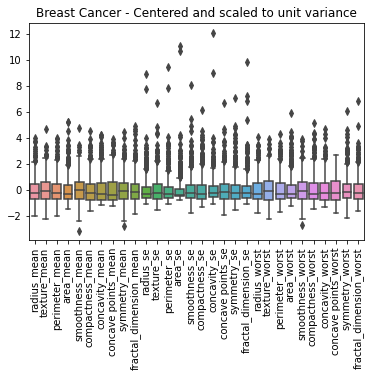

In [13]:
std_cancer = scale_data(cancer, True)

###### Dealing with skewness
Some of the features after scaling look strongly skewed to the right. I am going to apply transformation.

In [14]:
# Get a list of features which have strong skewness
sk_cancer = pd.DataFrame(cancer.skew(axis=0))

sk_condition = (sk_cancer.loc[:,0]<1) & (sk_cancer.loc[:,0]>(-1))

sk_features = sk_cancer[~sk_condition].index.values
sk_features

# reference
# https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de#:~:text=skewness()%20function%20in%20pandas,present%20in%20the%20DataFrame%20object.

array(['area_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype=object)

In [15]:
# Transforming data
cancer.loc[:,sk_features] = cancer.loc[:,sk_features]**(0.5)
cancer.loc[:,sk_features] = np.log(cancer.loc[:,sk_features]+1)

cancer.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,3.485495,0.11840,0.423225,0.436844,0.324643,0.2419,0.247292,0.716093,0.668584,1.368817,2.594170,0.076955,0.200038,0.208474,0.118650,0.159813,0.075753,1.798049,17.33,2.680114,3.827190,0.1622,0.596550,0.611797,0.2654,0.517785,0.296259
1,20.57,17.77,132.90,3.622053,0.08474,0.247195,0.258347,0.234990,0.1812,0.213541,0.552289,0.618790,1.044989,2.262489,0.069791,0.108287,0.127849,0.109534,0.111412,0.057732,1.791593,23.41,2.610186,3.811687,0.1238,0.359053,0.399801,0.1860,0.421604,0.261104
2,19.69,21.25,130.00,3.574711,0.10960,0.336383,0.367623,0.305741,0.2069,0.219078,0.622446,0.635027,1.144624,2.369955,0.075499,0.182447,0.178778,0.134056,0.139762,0.065422,1.767278,25.53,2.591448,3.745734,0.1444,0.501706,0.513493,0.2430,0.470680,0.259236
3,11.42,20.38,77.58,3.027688,0.14250,0.427111,0.399665,0.280918,0.2597,0.271670,0.532972,0.730045,1.049447,1.827486,0.091162,0.241450,0.213439,0.128075,0.218487,0.091629,1.581316,26.50,2.392731,3.211910,0.2098,0.657910,0.603657,0.2575,0.595942,0.347788
4,20.29,14.34,135.10,3.611293,0.10030,0.310727,0.368090,0.279868,0.1809,0.217165,0.626031,0.633350,1.203558,2.371927,0.101827,0.145723,0.213897,0.128653,0.124440,0.069077,1.748788,16.67,2.590537,3.705891,0.1374,0.373472,0.490085,0.1625,0.396229,0.244586


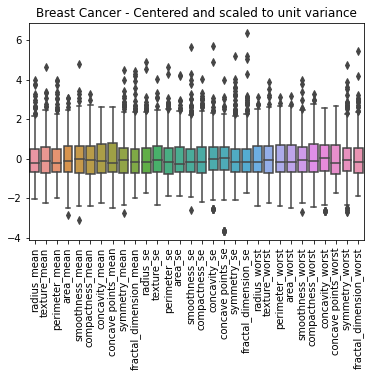

In [16]:
std_cancer = scale_data(cancer, True)

Looks way better. We can continue.

##### Principal Components

In [17]:
pca_fit, PCs_cancer, col_PCs = compute_pca(cancer, std_cancer)

In [18]:
PCs_cancer

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
radius_mean,0.214022,-0.233451,0.011166,-0.060651,-0.024974,0.002769,0.028191,0.067771,0.268730,0.150422,-0.029132,0.022173,0.089237,0.044439,-0.085080,0.176087,0.087442,0.172809,0.079490,0.371178,-0.019548,0.160448,-0.101373,0.007937,0.030012,0.094248,-0.180386,0.138560,0.395812,-0.556104
texture_mean,0.101000,-0.063067,0.199050,0.564570,0.083448,-0.002085,-0.018608,0.117110,-0.064923,0.216747,0.523799,-0.012298,0.065494,-0.018457,0.073440,0.128213,-0.026539,-0.010470,-0.072028,0.110131,-0.024448,-0.477812,-0.031303,-0.024546,0.039261,0.038729,-0.048773,-0.002990,-0.013171,-0.006413
perimeter_mean,0.221938,-0.214433,0.010176,-0.059723,-0.023992,0.004228,0.036546,0.058665,0.274691,0.151008,-0.015875,-0.008152,0.085420,0.080675,-0.080190,0.175227,0.095912,0.170363,0.127626,0.348132,-0.029991,0.155936,-0.049343,0.062768,0.001862,0.058187,-0.156707,-0.182821,-0.454371,0.520658
area_mean,0.210110,-0.246562,-0.013827,-0.051628,-0.001693,0.016146,-0.004164,0.036483,0.245405,0.134490,-0.031744,0.055481,0.016038,-0.088179,-0.123850,0.053499,-0.107995,-0.065466,0.005361,-0.045628,0.050015,-0.117084,-0.066432,-0.077460,-0.265707,-0.475344,0.653386,0.074163,0.072117,0.055790
smoothness_mean,0.140168,0.201142,-0.071531,-0.071409,-0.342504,-0.356333,-0.113150,-0.303032,0.218679,-0.081060,0.283637,-0.144626,0.127592,-0.426076,0.087609,0.028698,-0.217423,0.355414,-0.152505,-0.111166,0.024983,0.069302,-0.042083,0.039205,0.011739,0.016902,-0.016496,-0.001307,-0.005371,0.004338
compactness_mean,0.237082,0.151924,-0.069957,-0.018743,0.006192,-0.019953,0.080783,-0.098046,0.155973,0.054551,0.160086,-0.350700,-0.148625,0.147284,-0.055507,-0.285660,0.027253,-0.160875,0.252984,-0.019761,-0.609323,-0.008208,0.231042,-0.003318,-0.247287,0.119362,0.027005,0.031263,0.009616,-0.039499
concavity_mean,0.254006,0.057155,-0.045536,-0.035342,0.124652,-0.009816,-0.154380,-0.044989,0.013197,-0.046952,-0.004669,-0.023659,0.315795,0.226923,0.237073,-0.196583,-0.039634,-0.078557,0.044808,0.054619,0.139070,-0.049762,0.151842,0.692592,0.269705,-0.093976,0.132402,0.025382,0.030539,-0.020063
concave points_mean,0.255357,-0.018473,-0.048838,-0.075296,0.000147,-0.083930,-0.171453,-0.132263,0.098310,0.015211,0.097800,0.138059,-0.087753,0.180610,0.315529,-0.419696,-0.086593,-0.189557,0.010623,0.207616,0.377443,0.004782,0.096375,-0.518570,0.025660,0.003593,-0.096612,-0.015339,-0.016902,0.007410
symmetry_mean,0.130758,0.191695,0.005262,-0.009745,-0.374251,0.319050,-0.109047,-0.284481,-0.239354,0.641989,-0.131121,-0.069226,0.089846,0.036191,0.056478,0.204929,-0.029575,-0.195315,0.021395,-0.101002,0.042624,0.102711,-0.033665,-0.024025,0.032091,0.021763,-0.004857,0.008534,-0.000339,-0.002018
fractal_dimension_mean,0.054505,0.372898,-0.038500,-0.000292,-0.034368,-0.074945,0.305490,-0.192202,0.118118,-0.016731,0.206934,0.132934,0.115862,0.454440,-0.509018,-0.065586,0.209009,0.045580,-0.140620,-0.088111,0.206713,-0.030896,-0.192484,-0.019374,0.010154,-0.081842,-0.003780,0.000452,0.011724,-0.000935


##### Checking outliers

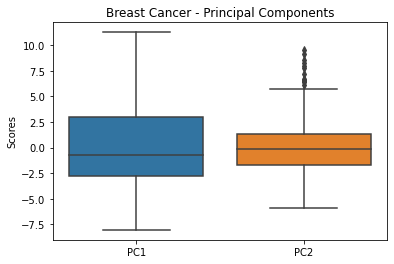

In [19]:
# Plot PC1 and PC2 in boxplot
ft_cancer=pd.DataFrame(pca_fit.transform(std_cancer), columns=col_PCs)

sns.boxplot(data=ft_cancer.iloc[:,:2])
plt.ylabel("Scores")
plt.title(data_title + " - Principal Components")
plt.show()

Outliers do not look terrible. We can continue.

###### Frist Principal Component 

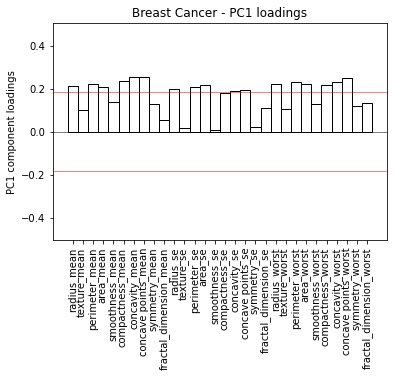

Average loading contribution: 0.18


,PC1,above_average
concave points_mean,0.255357,x
concavity_mean,0.254006,x
concave points_worst,0.250798,x
compactness_mean,0.237082,x
perimeter_worst,0.230411,x
concavity_worst,0.230277,x
radius_worst,0.222452,x
perimeter_mean,0.221938,x
area_worst,0.220472,x
compactness_worst,0.219255,x


In [20]:
plot_barGraphPC(PCs_cancer, draw_average=True)

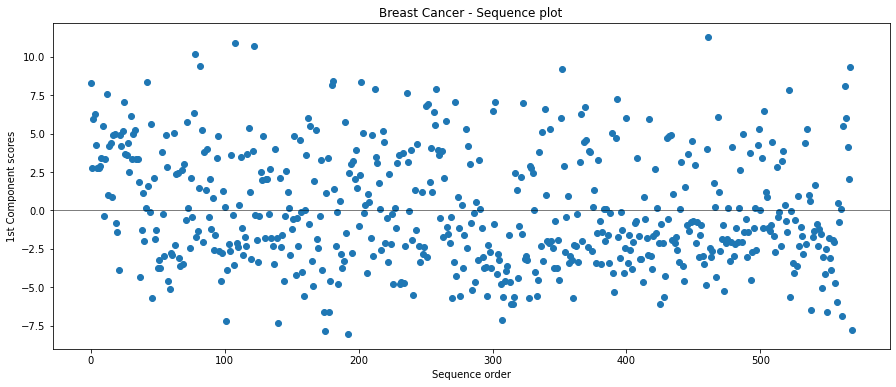

In [21]:
# Sequence plot
x = range(len(ft_cancer['PC1']))
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(x, ft_cancer['PC1'], marker = 'o', linestyle = 'None')
plt.axhline(0, color='k', linewidth=0.5)
plt.ylabel("1st Component scores")
plt.xlabel("Sequence order")
plt.title(data_title + ' - Sequence plot')
plt.show()

##### Covarience matrix, eigen values and eigen vectors

In [22]:
# Calculate the covariance matrix
features = std_cancer.T
covariance_m = np.cov(features, bias=True)
pd.DataFrame(covariance_m)

# With covariance matrix, compute eigan values and vectors.
eig_vals, eig_vecs = np.linalg.eig(covariance_m)

# Display first three eigan values
pd.DataFrame(eig_vals, index=['PC' + str(x) for x in range(1, len(eig_vals)+1)], columns=['eigen_values']).iloc[:3]

,eigen_values
PC1,13.872464
PC2,5.698168
PC3,2.746657


##### Explained Variance

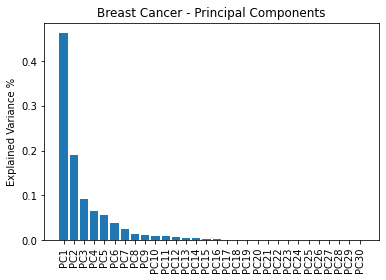

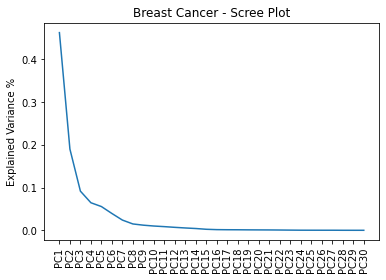

,explained_variance
PC1,0.462415
PC2,0.189939
PC3,0.091555
PC4,0.064440
PC5,0.055551
PC6,0.039322
PC7,0.023906
PC8,0.014827
PC9,0.011969
PC10,0.009987


In [23]:
plot_screeGraph(pca_fit)

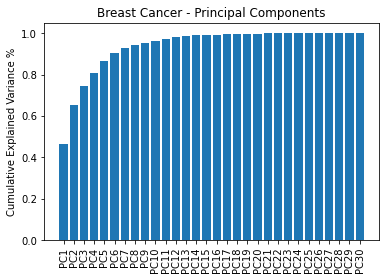

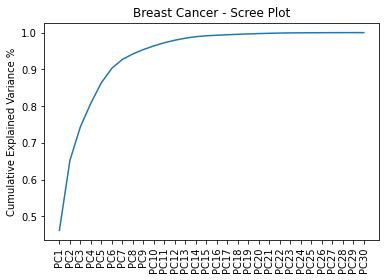

,cum_explained_variance
PC1,0.462415
PC2,0.652354
PC3,0.743910
PC4,0.808349
PC5,0.863900
PC6,0.903222
PC7,0.927129
PC8,0.941956
PC9,0.953925
PC10,0.963912


In [24]:
plot_screeGraph(pca_fit, True)

##### Plotting PC1 and PC2

In [25]:
ft_cancer = pd.concat([data,pd.DataFrame(pca_fit.transform(std_cancer), columns=col_PCs)], axis=1)
ft_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,8.266127,2.046587,-1.163564,-2.860269,-2.410616,1.221144,1.768580,-0.303860,-0.373637,-0.956144,-0.790493,-0.108445,-0.122235,0.772232,-0.291523,-0.378952,0.073055,-0.038634,-0.098710,-0.445500,-0.016550,-0.148767,0.091091,0.022817,0.019279,-0.056333,-0.078828,-0.100535,-0.005199,-0.012753
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,2.742985,-3.723689,-0.591003,-1.161937,-0.108783,0.019454,0.921368,0.301055,0.044001,0.697059,-0.475472,1.409101,-0.108059,0.174042,0.004413,0.399485,-0.108995,-0.031277,-0.156617,0.024595,-0.009170,0.083924,0.069112,0.051269,-0.066401,0.004697,-0.098092,0.046088,0.018784,-0.021312
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,5.941834,-0.996258,-0.350316,-0.860181,-0.747155,0.522668,-0.121120,0.306801,-0.099161,0.219870,0.487943,0.175729,-0.521329,-0.322930,0.514966,-0.026106,0.255099,0.188454,-0.342155,0.201147,0.011527,-0.054660,-0.081510,0.109791,-0.015423,-0.096027,-0.015107,0.050306,-0.001823,-0.002019
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,6.307073,9.148115,-1.909709,0.883798,-3.339129,1.866959,0.602012,0.661401,0.656888,-1.435522,0.938188,0.609163,-0.498734,0.234512,-0.144373,0.267614,0.114815,0.020544,-0.375361,0.153947,0.325153,-0.313254,0.109470,0.068647,0.056511,0.155866,0.203999,0.039142,0.078842,0.037012
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,4.267036,-1.777177,0.858052,-3.395343,0.245046,-1.307847,-0.055755,0.885891,-0.038230,0.650398,-0.417830,0.366799,0.623034,0.275880,0.046337,-0.097892,-0.207542,0.067119,0.335483,0.024390,-0.177957,0.006533,0.024392,0.010118,-0.066916,-0.059566,0.039828,-0.026347,-0.000058,0.016965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,6.033236,-3.115418,2.095676,-1.490501,0.481291,-2.601450,-0.318643,-0.106224,-0.683343,0.535035,0.072845,0.340490,0.208969,-0.014490,0.432221,0.104973,0.055513,0.496666,-0.208272,0.159275,0.140815,-0.068107,-0.052641,0.153319,-0.003430,-0.013753,0.101176,0.021985,-0.013455,-0.014163
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.46

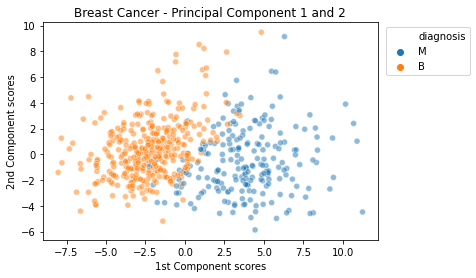

In [26]:
# Plot PC1 and PC2 in scatterplot
fig, ax = plt.subplots()
sns.scatterplot(x="PC1", y="PC2", data=ft_cancer, hue="diagnosis", alpha=0.5)
plt.ylabel("2nd Component scores")
plt.xlabel("1st Component scores")
plt.title("Breast Cancer - Principal Component 1 and 2")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()